<a href="https://colab.research.google.com/github/juyongkak/MLproject/blob/main/Keras_CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.utils import np_utils # One-hot vector
from keras.datasets import cifar10 # Load CIFAR-10 dataset
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from google.colab.patches import cv2_imshow

In [ ]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))

x_train : (50000, 32, 32, 3)
y_train : (50000, 1)


In [ ]:
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))

x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


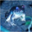

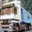

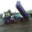

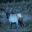

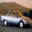

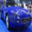

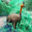

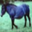

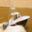

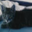

In [ ]:
# Training image 10개 미리보기기
for i in range(10):
  cv2_imshow(x_train[i])

In [ ]:
# Normalization(?)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-Hot Encoding (숫자를 One-hot vector로)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
print('y_train :', np.shape(y_train))

y_train : (50000, 10)




---


**CNN 모델 정의하기**


> *   모델 구성하기







In [ ]:
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3

In [ ]:
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')

# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

In [ ]:
# Pool_size : MaxPooling의 Window size
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten()) # N차원배열을 1차원으로 펴준다.
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                   

**학습 시작**


> loss : 목적함수 \\
> categorical_crossentry : 분류가 2개 이상인 CEE \\
> optimizer : 학습 방법, SGD를 사용합니다. \\
> metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 38s 17ms/step - loss: 2.0358 - accuracy: 0.2551 - val_loss: 1.7598 - val_accuracy: 0.3811
Epoch 2/15
1563/1563 [==============================] - 24s 16ms/step - loss: 1.6192 - accuracy: 0.4205 - val_loss: 1.5435 - val_accuracy: 0.4389
Epoch 3/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4249 - accuracy: 0.4913 - val_loss: 1.3722 - val_accuracy: 0.5056
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2916 - accuracy: 0.5405 - val_loss: 1.2720 - val_accuracy: 0.5442
Epoch 5/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1714 - accuracy: 0.5862 - val_loss: 1.1805 - val_accuracy: 0.5811
Epoch 6/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0633 - accuracy: 0.6267 - val_loss: 1.0842 - val_accuracy: 0.6132
Epoch 7/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9706 - accuracy: 0.6585 - val_loss: 1.0532 -

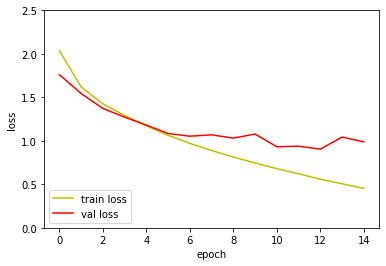

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.ylim([0.0,2.5])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(loc='lower left')

plt.rcParams["figure.figsize"] = (8,6)
plt.show()

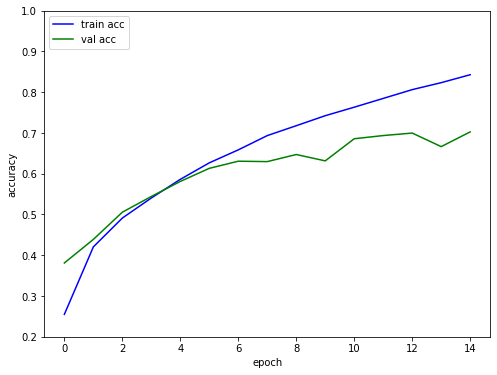

In [ ]:
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')

plt.ylim([0.2,1.0])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(loc='upper left')

plt.rcParams["figure.figsize"] = (8,6)
plt.show()

**모델 평가**

In [ ]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.9877 - accuracy: 0.7026
Test set Loss and Accuracy
[0.9877381920814514, 0.7026000022888184]


예측측 :고양이 / 정답답 : 고양이


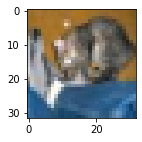

예측측 :배 / 정답답 : 배


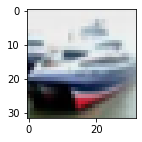

예측측 :배 / 정답답 : 배


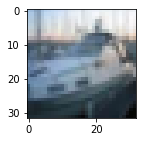

예측측 :비행기 / 정답답 : 비행기


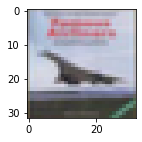

예측측 :개구리 / 정답답 : 개구리


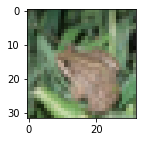

예측측 :개구리 / 정답답 : 개구리


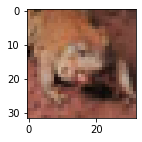

예측측 :자동차 / 정답답 : 자동차


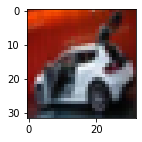

예측측 :개구리 / 정답답 : 개구리


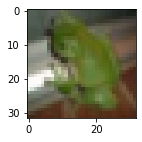

예측측 :고양이 / 정답답 : 고양이


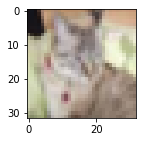

예측측 :자동차 / 정답답 : 자동차


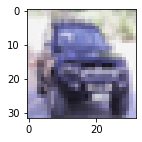

In [ ]:
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

plt.rcParams["figure.figsize"] = (2,2)

for i in range(10):
  output = model.predict(x_test[i].reshape(1,width,height,channel))
  plt.imshow(x_test[i].reshape(width,height,channel))

  print('예측측 :' + labels[np.argmax(output)] + ' / 정답답 : ' + labels[np.argmax(y_test[i])])
  plt.show()



---
**MLP 모델**


In [23]:
model = Sequential()

# Input layer
model.add(Dense(16, input_dim=width * height * channel , activation='relu'))

# Hidden layers 
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
number_of_class = 10
model.add(Dense(number_of_class, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, nb_epoch=15, batch_size=32)

TypeError: ignored

In [ ]:
print('모델 평가')
evaluation = model.evaluate(x_test, y_test, batch_size=32)
print('Accuracy: ' + str(evaluation[1]))